## Búsqueda

En esta libreta exploraremos búsqueda en gráficas.

Antes de empezar con búsqueda, debemos pensar en las posibles maneras de expresar una gráfica en la computadora: A veces la tenemos en memoria, a veces no, etc.

Posibles maneras de expresar una gráfica:
1. Una lista de aristas
2. Una matriz de adyacencia
3. Para cada vértice tenemos una manera de encontrar sus vecinos.

Pros y cons:
1. Es sencillo recorrer todas las aristas, ordenarlas, etc. Agregar vértices o aristas es trivial. Quitarlos es muy pesado.
2. Es sencillo saber si dos vértices están conectados o no. Agregar y quitar aristas es trivial. Quitar o agregar vértices es muy pesado. Toma una cantidad cuadrática de memoria.
3. Dependiendo de la estructura de datos que usemos para guardar vecinos qué tan fácil o difícil sea encontrar si dos están conectados, etc. Es fácil encontrar los vecinos de un vértice, y la mayoría de los algoritmos en gráficas requieren esto.


En matemáticas muchas veces vamos a tener gráficas gigantescas en donde más bien podemos saber los "vecinos" de un vértice.

Para empezar, vamos a ver cómo programaríamos un resolvedor de laberintos (medio chafón).

In [1]:
import random

In [2]:
def crear_laberinto(n,m,p=0.25):
    M = [[0]*m for i in range(n)]
    for x in range(n):
        for y in range(m):
            if random.random() < p:
                M[x][y] = 1
    M[0][0] = 0
    M[-1][-1] = 0
    return M

Digamos que queremos llegar de la casilla (0,0) a la casilla (n-1,m-1) (la última).

In [3]:
from copy import deepcopy

In [4]:
def vecinos(M,x,y):
    n,m = len(M), len(M[0])
    candidatos = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
    V = []
    for xp,yp in candidatos:
        if not (xp < 0 or yp < 0 or xp>=n or yp >= m):
            if M[xp][yp] == 0:
                V.append((xp,yp))
    return V

In [5]:
def encontrar_camino(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = [caminotrivial]
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.pop(0)
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [6]:
def es_objetivo(M,u):
    n,m = len(M), len(M[0])
    return u == (n-1,m-1)

In [7]:
def expander_camino(M,P,frontera,explorados):
    u = P[-1]
    for v in vecinos(M,*u):
        if v not in explorados:
            Q = deepcopy(P)
            Q.append(v)
            frontera.append(Q)

In [8]:
M=crear_laberinto(10,10,0.25); M

[[0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [9]:
camino=encontrar_camino(M); camino

[(0, 0),
 (1, 0),
 (2, 0),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (2, 4),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 8),
 (2, 7),
 (2, 6),
 (3, 6),
 (3, 7),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 9),
 (5, 8),
 (5, 7),
 (5, 6),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 9),
 (7, 8),
 (8, 8),
 (8, 9),
 (9, 9)]

In [10]:
def imprimir_camino(M,camino):
    A = deepcopy(M)
    for x,y in camino:
        A[x][y] = 8
    return A

In [11]:
imprimir_camino(M,camino)

[[8, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [8, 1, 1, 0, 8, 8, 8, 8, 8, 0],
 [8, 8, 1, 8, 8, 1, 8, 8, 8, 1],
 [1, 8, 8, 8, 1, 0, 8, 8, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 8, 8, 8],
 [0, 1, 0, 0, 1, 1, 8, 8, 8, 8],
 [0, 0, 0, 1, 0, 0, 8, 8, 8, 8],
 [1, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 8]]

In [52]:
L = [1,2,3,4,5]

In [53]:
L.pop(2)

3

In [54]:
L

[1, 2, 4, 5]

## BFS y deque

En el programa anterior, si cambiamos `P = frontera.pop()` por `P = frontera.pop(0)` estaremos haciendo BFS (breadth-first search) en vez de DFS.

PERO hay un problema: pop(0) es extremadamente lento: saca el 0-avo recorriendo todos los demás un espacio en memoria a la izquierda.

Entonces debemos usar otra estructura de datos: `deque` (double ended queue).

In [56]:
from collections import deque

In [57]:
D = deque()

In [61]:
D.append(8)

In [63]:
D.appendleft(7)

In [64]:
D

deque([7, 4, 8])

In [65]:
D.pop()

8

In [66]:
D

deque([7, 4])

In [67]:
D.popleft()

7

In [68]:
D

deque([4])

In [69]:
def encontrar_caminoBFS(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = deque([caminotrivial])
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.popleft()
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [70]:
M

[[0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [71]:
camino = encontrar_caminoBFS(M)

In [72]:
imprimir_camino(M,camino)

[[8, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [8, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [8, 8, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 8, 0, 0, 1, 0, 0, 0, 1, 0],
 [8, 8, 1, 1, 0, 0, 0, 0, 0, 0],
 [8, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [8, 8, 0, 1, 8, 8, 8, 8, 8, 0],
 [1, 8, 8, 8, 8, 0, 0, 1, 8, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 8]]

## DFS, recursión, y la callstack (pila de llamadas)

Hay otra manera de programar DFS que a veces es más sencilla: con recursión.

Digamos que tenemos, por ejemplo, un árbol con raíz, y para cada nodo quisiéramos saber cuántos nodos hay "debajo" de él.

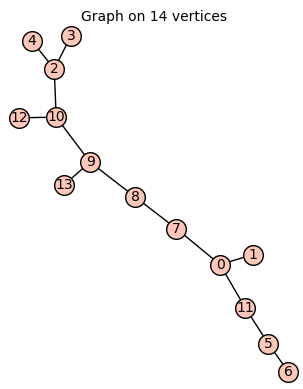

In [75]:
graphs.RandomTree(14)

In [18]:
def crear_arbol_aleatorio(n):
    hijos = [[] for i in range(n)]
    for i in range(1,n):
        padre = random.randint(0,i-1)
        hijos[padre].append(i)
    return hijos

In [84]:
arbol = crear_arbol_aleatorio(18); arbol

[[1, 3],
 [2, 6, 10, 14],
 [4, 5, 7, 12, 13, 15],
 [16],
 [8],
 [9, 11],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [17],
 []]

In [85]:
def arbol2sage(arbol):
    n = len(arbol)
    G = Graph(n)
    for u in range(n):
        for v in arbol[u]:
            G.add_edge(u,v)
    return G

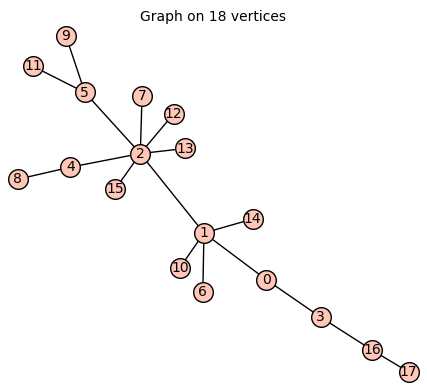

In [86]:
arbol2sage(arbol)

In [87]:
def factorial(n):
    if n < 2: return 1
    return n*factorial(n-1)

In [88]:
factorial(10000)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [89]:
r = 1
for i in range(1,10000):
    r *= i
r

2846259680917054518906413212119868890148051401702799230794179994274411340003764443772990786757784775815884062142317528830042339940153518739052421161382716174819824199827592418289259787898124253120594659962598670656016157203603239792632873671705574197596209947972034615369811989709261127750048419884541047554464244213657330307670362882580354896746111709736957860367019107151273058728104115864056128116538532596842582599558468814643042558983664931705925171720427659740744613340005419405246230343686915405940406622782824837151203832217864462718382292389963899282722187970245938769380309462733229257055545969002787528224254434802112755901916942542902891690721909708369053987374745248337289952180236328274121704026808676921045155584056717255537201585213282903427998981844931361064038148930449962159999935967089298019033699848440466541923625842494716317896119204123310826865107135451684554093603300960721034694437798234943078062606942230268188522759205702923084312618849760656074258627944882715595683153344

In [79]:
def cuantos_nodos_debajo(T, v):
    respuesta = 0
    for u in T[v]:
        respuesta += cuantos_nodos_debajo(T,u)+1
    return respuesta

In [83]:
cuantos_nodos_debajo(arbol,2)

0

Al llamar "cuantos_nodos_debajo" estamos en realidad usando la "pila de llamadas" (callstack) como la frontera!

## Ejercicios

1. Dada una gráfica (una lista de $n$ listas de vecinos), decide si es conexa o no.
2. Modifica el programa anterior para encontrar las componentes conexas
3. Bien-colorea una gráfica con $k$ colores si es posible.

In [22]:
def grafica_aleatoria(n,p = 0.5):
    G = [[] for i in range(n)] # grafica vacia
    for u in range(n):
        for v in range(u+1,n):
            if random.random() < p:
                G[u].append(v)
                G[v].append(u)
    return G

In [24]:
S = Graph(5)

In [27]:
def to_sage(G):
    n = len(G)
    S = Graph(n)
    for u in range(n):
        for v in G[u]:
            if u < v:
                S.add_edge((u,v))
    return S

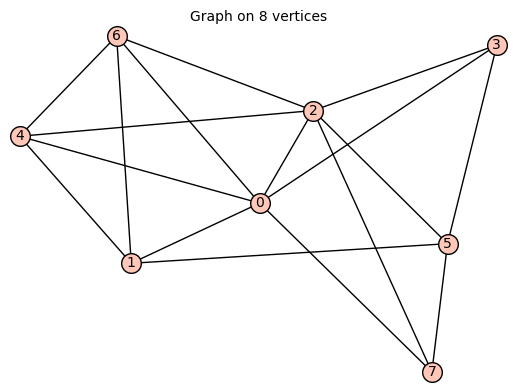

In [95]:
to_sage(grafica_aleatoria(8,0.5))

### Bonus: encontrar el error :(

In [48]:
G=[[0,1,0,1,1,0,0,0],[1,0,1,0,0,1,0,0],[0,1,0,1,0,0,1,0],[1,0,1,0,0,0,0,1],[1,0,0,0,0,1,0,1],[0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[0,0,0,1,1,0,1,0]]

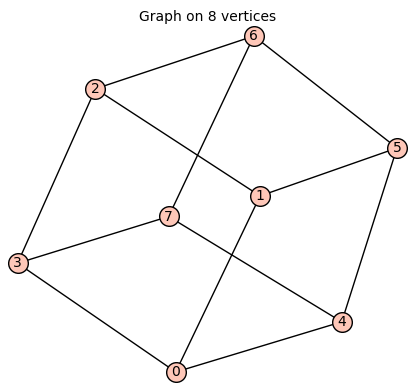

In [51]:
Graph(Matrix(G))

## Soluciones

#### Decidir si una gráfica es conexa.

In [130]:
G

[[2, 5, 7, 9],
 [2, 3],
 [0, 1, 3, 4, 6, 8, 9],
 [1, 2, 7],
 [2, 6, 7, 9],
 [0, 8, 9],
 [2, 4],
 [0, 3, 4, 9],
 [2, 5],
 [0, 2, 4, 5, 7]]

In [135]:
def es_conexa(G):
    n = len(G)
    if n < 2: return True
    
    explorados = [False]*n
    dfs_marcar_conectados(G,0,explorados)
    return False not in explorados
    

In [136]:
def dfs_marcar_conectados(G,v,explorados):
    explorados[v] = True
    for u in G[v]:
        if not explorados[u]:
            dfs_marcar_conectados(G,u,explorados)

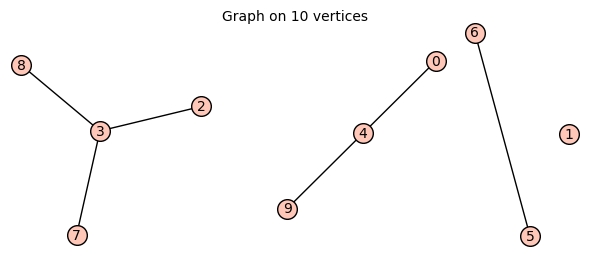

In [144]:
G = grafica_aleatoria(10,0.2); to_sage(G)

In [138]:
es_conexa(G)

False

Solucion de componentes conexas

In [142]:
def componentes_conexas(G):
    n = len(G)
    if n < 2: return True
    
    colores = [-1]*n
    color = 0
    for v in range(n):
        if colores[v] == -1:
            dfs_colorear(G,v,colores,color)
            color += 1
    
    return colores

def dfs_colorear(G,v,colores,color):
    colores[v] = color
    for u in G[v]:
        if colores[u] == -1:
            dfs_colorear(G,u,colores,color)

In [145]:
componentes_conexas(G)

[0, 1, 2, 2, 0, 3, 3, 2, 2, 0]

Solucion de bien-coloreada

In [ ]:
def es_valida(G,coloracion):
    u = len(coloracion)-1
    for v in G[u]:
        if v < u and coloracion[u] == coloracion[v]:
            return False
    return True

In [ ]:
def vecinos(G,coloracion,k):
    V = []
    for color in range(k):
        nueva = coloracion+[color]
        if es_valida(G,nueva):
            V.append(nueva)
    return V

In [ ]:
def bien_colorear(G,k):
    n = len(G)
    frontera = [[0]]
    while frontera:
        coloracion = frontera.pop()
        if len(coloracion) == n:
            return coloracion
        for c in vecinos(G,coloracion):
            frontera.append(c)
    print("No hay coloración!")
    return None